In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
from pandas import DataFrame, Series
import datetime

In [2]:
def process_data(data_set):
    start = datetime.datetime(2014, 1, 1)
    end = datetime.datetime(2019,4,30)
    
    all_data = {}
    for ticker in data_set:
        all_data[ticker] = pdr.get_data_yahoo(ticker, start, end)
    
    Adj_close = DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})
    High = DataFrame({tic: data['High'] for tic, data in all_data.items()})
    Low = DataFrame({tic: data['Low'] for tic, data in all_data.items()})
    Close = DataFrame({tic: data['Close'] for tic, data in all_data.items()})
        
    return Adj_close, High, Low, Close

In [3]:
tickers = ['JKE', 'IWF','VTI','AOA', 'SCHX','VPL','VWO','BND','AGG', 'BLV','IAU']

all_data = process_data(tickers)

In [4]:
all_data[0].head()

,JKE,IWF,VTI,AOA,SCHX,VPL,VWO,BND,AGG,BLV,IAU
Date,,,,,,,,,,,
2013-12-31,94.472626,79.201256,84.738609,37.710819,39.011066,51.982285,34.600319,67.142357,90.489296,63.431301,11.68
2014-01-02,93.923103,78.510162,83.996521,37.321964,38.665913,51.057976,33.389236,67.201050,90.548790,63.648823,11.88
2014-01-03,93.496719,78.408775,83.978867,37.347317,38.674755,51.244526,33.347179,67.209480,90.582863,63.765339,12.01
2014-01-06,93.250404,77.938866,83.757996,37.296593,38.577400,51.032539,33.027584,67.268166,90.701874,63.920723,12.01
2014-01-07,93.913635,78.547020,84.296883,37.465664,38.816353,51.185162,33.162144,67.352066,90.744354,64.130486,11.95


In [5]:
writer = pd.ExcelWriter('myAssetPool_final.xlsx', engine = 'xlsxwriter')

all_data[0].to_excel(writer, sheet_name = 'Adj_close')
all_data[1].to_excel(writer, sheet_name = 'High')
all_data[2].to_excel(writer, sheet_name = 'Low')
all_data[3].to_excel(writer, sheet_name = 'Close')

writer.save()

/Users/gillian0531/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


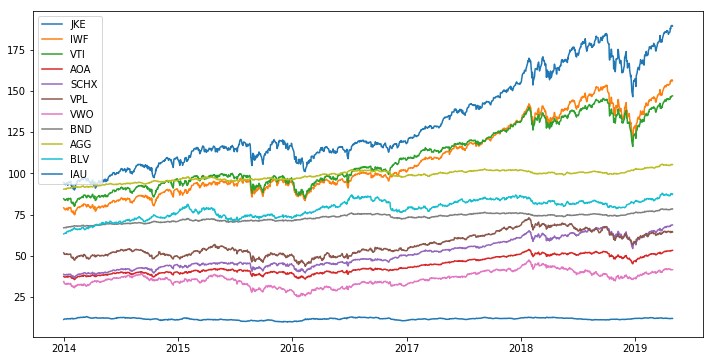

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(all_data[0].index, all_data[0])

plt.legend([tic for tic in all_data[0].columns], loc = 'upper left')

plt.show()